In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

In [45]:
def vel_collision(vel1, vel2, mass1, mass2):
    cm = (mass1*vel1 + mass2*vel2)/(mass1+mass2)
    cr = vel1 - vel2
    cr_mag = np.linalg.norm(cr, axis=1)
    N = vel1.shape[0]
    # cos_chi = 2*np.random.rand(N)-1
    cos_chi = np.random.rand(N)*0.2 + 0.25
    sin_chi = np.sqrt(1-cos_chi*cos_chi)*np.random.choice([-1, 1], size=N)
    eps = np.random.rand(N)*np.pi*2
    cr[:,0] = cr_mag*cos_chi
    cr[:,1] = cr_mag*sin_chi*np.cos(eps)
    cr[:,2] = cr_mag*sin_chi*np.sin(eps)
    Newvel1 = cm + mass2/(mass1+mass2)*cr
    Newvel2 = cm - mass1/(mass1+mass2)*cr
    return Newvel1, Newvel2

In [ ]:
def vel_collision_v2(vel1, vel2, mass1, mass2):
    v1p = np.sqrt(vel1)
    Vcm = (mass1*vel1 + mass2*vel2)/(mass1+mass2)
    cr = vel1 - vel2
    cr_mag = np.linalg.norm(cr, axis=1)
    N = vel1.shape[0]
    # cos_chi = 2*np.random.rand(N)-1
    cos_chi = np.random.rand(N)*0.2 + 0.25
    sin_chi = np.sqrt(1-cos_chi*cos_chi)*np.random.choice([-1, 1], size=N)
    eps = np.random.rand(N)*np.pi*2
    cr[:,0] = cr_mag*cos_chi
    cr[:,1] = cr_mag*sin_chi*np.cos(eps)
    cr[:,2] = cr_mag*sin_chi*np.sin(eps)
    Newvel1 = cm + mass2/(mass1+mass2)*cr
    Newvel2 = cm - mass1/(mass1+mass2)*cr
    return Newvel1, Newvel2

In [25]:
DXsec = np.load('./DXsec_Al.npy')
def DCS_pdf(energy):
    randChoice = np.random.randint(int(1e6), size=(energy.shape[0]))
    chi = DXsec[randChoice]
    return chi

In [30]:
def vel_collision_chipdf(vel1, vel2, mass1, mass2):
    cm = (mass1*vel1 + mass2*vel2)/(mass1+mass2)
    cr = vel1 - vel2
    cr_mag = np.linalg.norm(cr, axis=1)
    energy = 0.5*cr_mag**2
    N = vel1.shape[0]
    chi = DCS_pdf(energy)
    cos_chi = np.cos(chi)
    sin_chi = np.sin(chi)
    eps = np.random.rand(N)*np.pi*2
    cr[:,0] = cr_mag*cos_chi*np.random.choice([-1, 1], size=N)
    cr[:,1] = cr_mag*sin_chi*np.cos(eps)
    cr[:,2] = cr_mag*sin_chi*np.sin(eps)
    Newvel1 = cm + mass2/(mass1+mass2)*cr
    Newvel2 = cm - mass1/(mass1+mass2)*cr
    return Newvel1, Newvel2

In [2]:
def rotate_matrix(phi, theta):
    phi_array = np.expand_dims(phi, axis=(0, 1))
    theta_array = np.expand_dims(theta, axis=(0, 1))
    cos_phi = np.cos(phi_array)
    sin_phi = np.sin(phi_array)
    cos_theta = np.cos(theta_array)
    sin_theta = np.sin(theta_array)
    matrix_i = np.concatenate((cos_theta*cos_phi, cos_theta*sin_phi, -sin_theta), axis=1)
    matrix_j = np.concatenate((matrix_i, np.concatenate((-sin_phi, cos_phi, np.zeros_like(phi_array)), axis=1)), axis=0)
    matrix = np.concatenate((matrix_j, np.concatenate((sin_theta*cos_phi, sin_theta*sin_phi, cos_theta), axis=1)), axis=0)

    return matrix.T

In [87]:
N = 10

vtest = np.random.rand(N, 3)
print(vtest)

z = np.random.rand(N)*np.pi*2
y = np.random.rand(N)*np.pi*2
# y = 0

rz = R.from_matrix(rotate_matrix(z, y))

vtest_rotate = rz.apply(vtest)
# print(vtest_rotate)

vtest_return = rz.apply(vtest_rotate, inverse=True)

# print(vtest_return)

print(np.allclose(vtest, vtest_return))

[[0.95140997 0.82200116 0.17436473]
 [0.79820382 0.66302956 0.97409067]
 [0.5937844  0.90298108 0.72610235]
 [0.25603018 0.31519188 0.78471066]
 [0.10484056 0.36807534 0.83204422]
 [0.43884473 0.6336166  0.64715439]
 [0.60263618 0.32470327 0.67782935]
 [0.53290644 0.22330166 0.50839647]
 [0.70998167 0.6798975  0.02440237]
 [0.11468135 0.0242426  0.84247439]]
True


In [ ]:
vtest = np.random.rand(3)
print(vtest)

z = np.random.rand()*np.pi*2
y = np.random.rand()*np.pi*2
# y = 0

rz = R.from_matrix([[np.cos(z)*np.cos(y), -np.sin(z), np.cos(z)*np.sin(y)],
                    [np.sin(z)*np.cos(y),  np.cos(z), np.sin(z)*np.sin(y)],
                    [np.sin(y),                    0,           np.cos(y)]])

vtest_rotate = rz.apply(vtest)
print(vtest_rotate)


In [155]:
N = 4
vtest = np.zeros((N,3))
for i in range(N):
    vtest[i] = np.array([[1,2,3]])

print(vtest.shape)

c = np.arange(N)
print(c)
np.multiply(vtest.T, c).T
# np.multiply(c, vtest)

(4, 3)
[0 1 2 3]


array([[0., 0., 0.],
       [1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]])

In [ ]:
def rotate_matrix(phi, theta):
    phi_array = np.expand_dims(phi, axis=(0, 1))
    theta_array = np.expand_dims(theta, axis=(0, 1))
    cos_phi = np.cos(phi_array)
    sin_phi = np.sin(phi_array)
    cos_theta = np.cos(theta_array)
    sin_theta = np.sin(theta_array)
    matrix_i = np.concatenate((cos_theta*cos_phi, cos_theta*sin_phi, -sin_theta), axis=1)
    matrix_j = np.concatenate((matrix_i, np.concatenate((-sin_phi, cos_phi, np.zeros_like(phi_array)), axis=1)), axis=0)
    matrix = np.concatenate((matrix_j, np.concatenate((sin_theta*cos_phi, sin_theta*sin_phi, cos_theta), axis=1)), axis=0)

    return matrix.T

In [660]:
N = 200
vtest = np.zeros((N,3))
direction = np.random.rand(3)*6 -6
for i in range(N):
    vtest[i] = np.array([-1, 1, -0])

# print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
# print(vNorm)
theta1 = np.arccos(vtest[:, 2]/vNorm)
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])
print(theta1)
rotate_matrix(phi1, theta1)[0]

[1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.5707

array([[ 4.32978028e-17,  7.07106781e-01,  7.07106781e-01],
       [-4.32978028e-17,  7.07106781e-01, -7.07106781e-01],
       [-1.00000000e+00,  0.00000000e+00,  6.12323400e-17]])

In [690]:
y = theta1[0]
z = phi1[0]
rz = np.array([[np.cos(z)*np.cos(y), -np.sin(z), np.cos(z)*np.sin(y)],
                    [np.sin(z)*np.cos(y),  np.cos(z), np.sin(z)*np.sin(y)],
                    [-np.sin(y),                    0,           np.cos(y)]])

ry = np.array([[np.cos(y),          0, np.sin(y)],
                    [0,          np.cos(z),        0],
                    [-np.sin(y),    0,     np.cos(y)]])

print(rz)
print(ry)

[[ 4.32978028e-17 -7.07106781e-01  7.07106781e-01]
 [ 4.32978028e-17  7.07106781e-01  7.07106781e-01]
 [-1.00000000e+00  0.00000000e+00  6.12323400e-17]]
[[ 6.12323400e-17  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  7.07106781e-01  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00  6.12323400e-17]]


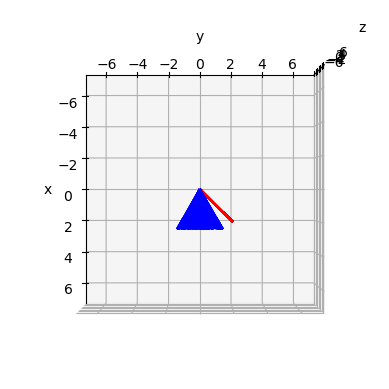

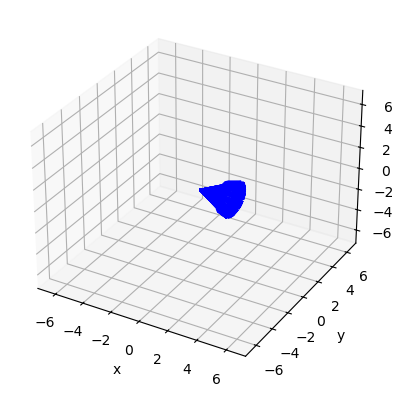

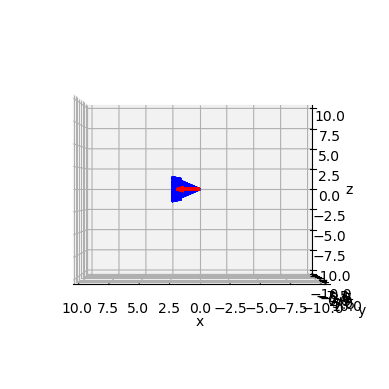

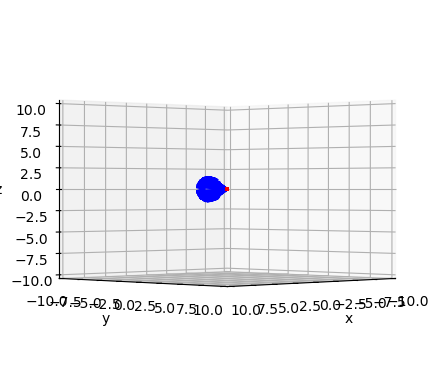

In [698]:
N = 100
vtest = np.zeros((N,3))
direction = np.random.rand(3)*6 -6
for i in range(N):
    vtest[i] = np.array([2, 2, 0])

# print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
# print(vNorm)
theta1 = np.arccos(vtest[:, 2]/vNorm)
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])
# phi1 = np.arctan2(vtest[:, 1], vtest[:, 0])

# rotateMat = np.array([np.sin(theta1)*np.cos(phi1), np.sin(theta1)*np.sin(phi1), np.cos(theta1)])
# print(rotateMat)
# print(rotateMat*vNorm)

chi = np.ones(N)*np.pi/6
phi = np.pi*2*np.random.rand(N)

rotateMat = np.array([np.sin(chi)*np.cos(phi), np.sin(chi)*np.sin(phi), np.cos(chi)])
# Vrotate = Vrotate*vNorm
Vrotate = np.multiply(rotateMat, vNorm).T
# print(Vrotate)
# print(np.linalg.norm(Vrotate, axis=1))

# rz = R.from_matrix([[np.cos(z), -np.sin(z), 0],
#                     [np.sin(z),  np.cos(z), 0],
#                     [0,          0,         1]])

# ry = R.from_matrix([[np.cos(y),          0, np.sin(y)],
#                     [0,          np.cos(z),        0],
#                     [-np.sin(y),    0,     np.cos(y)]])
rz = R.from_matrix(rotate_matrix(np.zeros_like(phi1), theta1))
# rz = R.from_matrix(rotate_matrix(phi1, np.zeros_like(phi1)))
# rz = R.from_matrix(rotate_matrix(phi1, theta1))
# vtest_rotate = rz.apply(Vrotate, inverse=True)
vtest_rotate = rz.apply(Vrotate)
# print(vtest_rotate)
vtestplus = vtest + vtest_rotate

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45, roll=0)
plt.show()

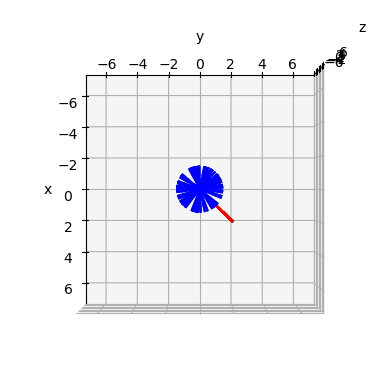

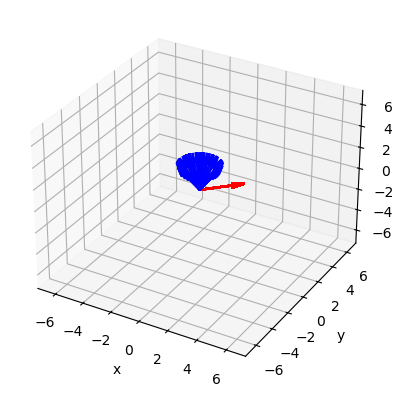

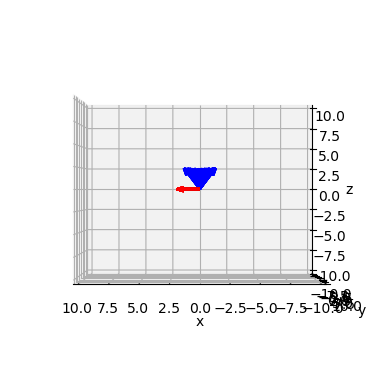

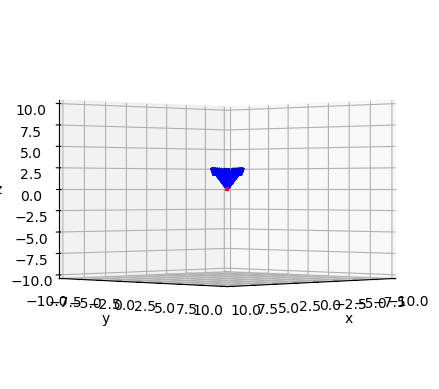

In [697]:
N = 100
vtest = np.zeros((N,3))
direction = np.random.rand(3)*6 -6
for i in range(N):
    vtest[i] = np.array([2, 2, 0])

# print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
# print(vNorm)
theta1 = np.arccos(vtest[:, 2]/vNorm)
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])
# phi1 = np.arctan2(vtest[:, 1], vtest[:, 0])

# rotateMat = np.array([np.sin(theta1)*np.cos(phi1), np.sin(theta1)*np.sin(phi1), np.cos(theta1)])
# print(rotateMat)
# print(rotateMat*vNorm)

chi = np.ones(N)*np.pi/6
phi = np.pi*2*np.random.rand(N)

rotateMat = np.array([np.sin(chi)*np.cos(phi), np.sin(chi)*np.sin(phi), np.cos(chi)])
# Vrotate = Vrotate*vNorm
Vrotate = np.multiply(rotateMat, vNorm).T
# print(Vrotate)
# print(np.linalg.norm(Vrotate, axis=1))

# rz = R.from_matrix([[np.cos(z), -np.sin(z), 0],
#                     [np.sin(z),  np.cos(z), 0],
#                     [0,          0,         1]])

# ry = R.from_matrix([[np.cos(y),          0, np.sin(y)],
#                     [0,          np.cos(z),        0],
#                     [-np.sin(y),    0,     np.cos(y)]])
# rz = R.from_matrix(rotate_matrix(np.zeros_like(phi1), theta1))
rz = R.from_matrix(rotate_matrix(phi1, np.zeros_like(phi1)))
# rz = R.from_matrix(rotate_matrix(phi1, theta1))
# vtest_rotate = rz.apply(Vrotate, inverse=True)
vtest_rotate = rz.apply(Vrotate)
# print(vtest_rotate)
vtestplus = vtest + vtest_rotate

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45, roll=0)
plt.show()

(200, 3)
[[-1.31195775e+00 -3.20605160e+00  2.12115048e-16]
 [ 2.97100989e+00  1.78131980e+00  2.12115048e-16]
 [ 1.50270268e-01  3.46084077e+00  2.12115048e-16]
 [-3.39849227e+00 -6.71006931e-01  2.12115048e-16]
 [-2.34750042e-01 -3.45613837e+00  2.12115048e-16]
 [ 3.22563822e+00 -1.26303527e+00  2.12115048e-16]
 [-9.36178109e-01 -3.33520173e+00  2.12115048e-16]
 [-2.21949645e-01  3.45698400e+00  2.12115048e-16]
 [-3.16219955e+00  1.41438821e+00  2.12115048e-16]
 [ 3.23377662e-01 -3.44897476e+00  2.12115048e-16]
 [ 1.13919952e+00 -3.27142545e+00  2.12115048e-16]
 [ 3.27716365e+00 -1.12258560e+00  2.12115048e-16]
 [-3.44208199e+00  3.89963578e-01  2.12115048e-16]
 [ 3.31573978e+00 -1.00293056e+00  2.12115048e-16]
 [-1.03032812e+00  3.30732883e+00  2.12115048e-16]
 [-1.26258352e+00 -3.22581507e+00  2.12115048e-16]
 [ 2.52888679e+00 -2.36743143e+00  2.12115048e-16]
 [-4.83767048e-01 -3.43015589e+00  2.12115048e-16]
 [-2.58767330e+00 -2.30302994e+00  2.12115048e-16]
 [ 1.91008345e+00 -2.8

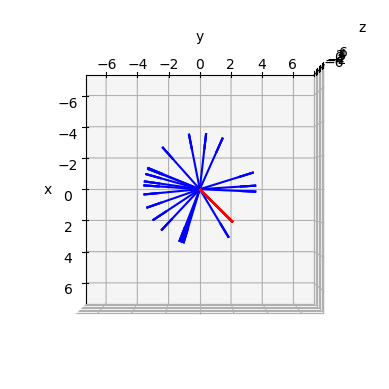

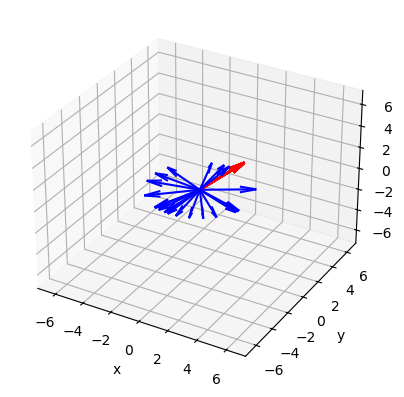

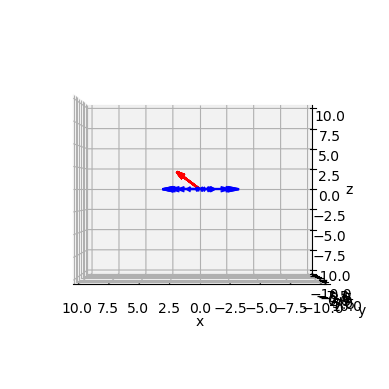

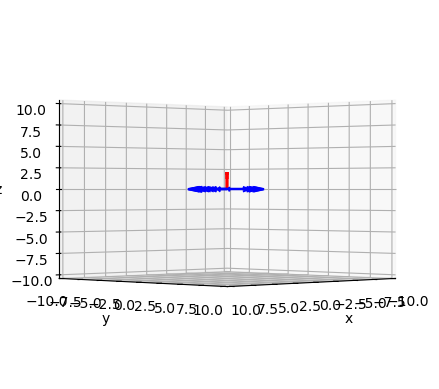

In [758]:
N = 20
vtest = np.zeros((N,3))
direction = np.random.rand(3)*6 -6
for i in range(N):
    vtest[i] = np.array([2, 2, 2])

# print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
# print(vNorm)
theta1 = np.arccos(vtest[:, 2]/vNorm)
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])
# phi1 = np.arctan2(vtest[:, 1], vtest[:, 0])

# rotateMat = np.array([np.sin(theta1)*np.cos(phi1), np.sin(theta1)*np.sin(phi1), np.cos(theta1)])
# print(rotateMat)
# print(rotateMat*vNorm)

chi = np.ones(N)*np.pi/2
phi = np.pi*2*np.random.rand(N)

rotateMat = np.array([np.sin(chi)*np.cos(phi), np.sin(chi)*np.sin(phi), np.cos(chi)])
print(Vrotate.shape)
# Vrotate = Vrotate*vNorm
Vrotate = np.multiply(rotateMat, vNorm).T
print(Vrotate)
# print(np.linalg.norm(Vrotate, axis=1))

rz = R.from_matrix(rotate_matrix(phi1, theta1))

# vtest_rotate = rz.apply(Vrotate, inverse=True)
vtest_rotate = rz.apply(Vrotate)
# print(vtest_rotate)
vtestplus = vtest + vtest_rotate

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], Vrotate[:,0], Vrotate[:,1], Vrotate[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], Vrotate[:,0], Vrotate[:,1], Vrotate[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], Vrotate[:,0], Vrotate[:,1], Vrotate[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], Vrotate[:,0], Vrotate[:,1], Vrotate[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45, roll=0)
plt.show()

In [ ]:

# vtest[i] = np.array([1, 1, 6]) +
# vtest[i] = np.array([1, 1, -6]) +
# vtest[i] = np.array([1, 2, -6]) +
# vtest[i] = np.array([1, -3, 6]) +
# vtest[i] = np.array([1, -3, -6]) +
# vtest[i] = np.array([-1, -3, -6]) bug - to correct
# vtest[i] = np.array([-1, 3, -6]) bug - to correct
# vtest[i] = np.array([-1, 3, 6]) bug - to correct
# vtest[i] = np.array([-1, -3, 6]) bug - to correct

(200, 3)
[[ 2.74201905e-01  2.07897328e+00 -2.36699882e+00]
 [ 2.09267875e+00  1.34209772e-01 -2.36699882e+00]
 [-1.62483443e+00 -1.32560540e+00 -2.36699882e+00]
 [-1.18729797e+00  1.72847914e+00 -2.36699882e+00]
 [-2.07145594e+00  3.26169999e-01 -2.36699882e+00]
 [-2.09562156e+00 -7.54113317e-02 -2.36699882e+00]
 [-1.60024791e+00  1.35518384e+00 -2.36699882e+00]
 [ 2.45261840e-01 -2.08258571e+00 -2.36699882e+00]
 [ 1.20861702e+00  1.71363984e+00 -2.36699882e+00]
 [-1.64470792e+00 -1.30086604e+00 -2.36699882e+00]
 [ 1.57749137e+00  1.38160689e+00 -2.36699882e+00]
 [ 1.88544918e+00 -9.17822408e-01 -2.36699882e+00]
 [-1.40356449e+00  1.55798694e+00 -2.36699882e+00]
 [-1.13507794e+00  1.76321147e+00 -2.36699882e+00]
 [ 1.73655855e+00 -1.17544927e+00 -2.36699882e+00]
 [ 1.55056971e+00  1.41175429e+00 -2.36699882e+00]
 [-1.22859957e+00  1.69937038e+00 -2.36699882e+00]
 [ 3.44717736e-01 -2.06845021e+00 -2.36699882e+00]
 [ 8.10304615e-01 -1.93409489e+00 -2.36699882e+00]
 [ 8.04354784e-03  2.0

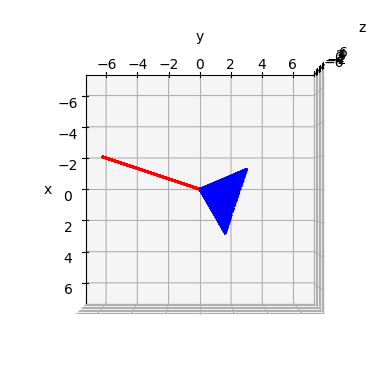

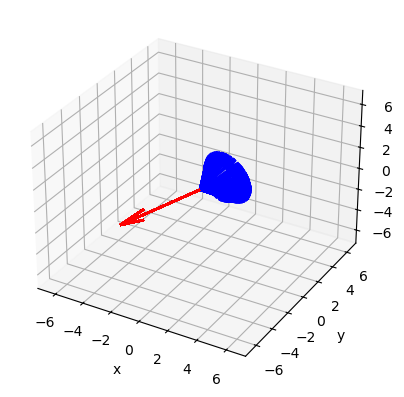

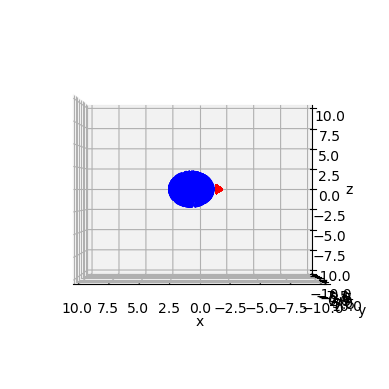

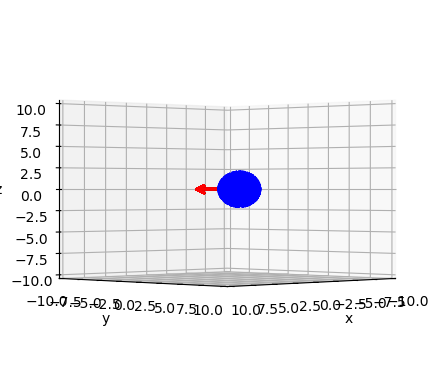

In [763]:
N = 200
vtest = np.zeros((N,3))
direction = np.random.rand(3)*6 -6
for i in range(N):
    vtest[i] = np.array([-1, -3, 0])

# print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
vfilp = np.ones(vtest.shape[0])
filp_indice = np.array(vtest[:, 0] < 0)
vfilp[filp_indice] = -1
# print(vNorm)
theta1 = np.arccos(vtest[:, 2]/vNorm)*vfilp
# print(vNorm)
# theta1 = -np.arccos(vtest[:, 2]/vNorm)
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])
# phi1 = np.arctan2(vtest[:, 1], vtest[:, 0])

# rotateMat = np.array([np.sin(theta1)*np.cos(phi1), np.sin(theta1)*np.sin(phi1), np.cos(theta1)])
# print(rotateMat)
# print(rotateMat*vNorm)

chi = np.ones(N)*np.pi/1.3
phi = np.pi*2*np.random.rand(N)

rotateMat = np.array([np.sin(chi)*np.cos(phi), np.sin(chi)*np.sin(phi), np.cos(chi)])
print(rotateMat.T.shape)
# Vrotate = rotateMat.T*vNorm
Vrotate = np.multiply(rotateMat, vNorm).T
print(Vrotate)
# print(np.linalg.norm(Vrotate, axis=1))

rz = R.from_matrix(rotate_matrix(phi1, theta1))

# vtest_rotate = rz.apply(Vrotate, inverse=True)
vtest_rotate = rz.apply(Vrotate)
# print(vtest_rotate)
vtestplus = vtest + vtest_rotate

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0]*2, vtest[:,1]*2, vtest[:,2]*2, color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0]*2, vtest[:,1]*2, vtest[:,2]*2, color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0]*2, vtest[:,1]*2, vtest[:,2]*2, color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0]*2, vtest[:,1]*2, vtest[:,2]*2, color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45, roll=0)
plt.show()

(20, 3)
(20, 3)


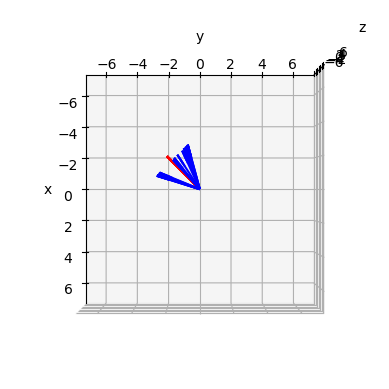

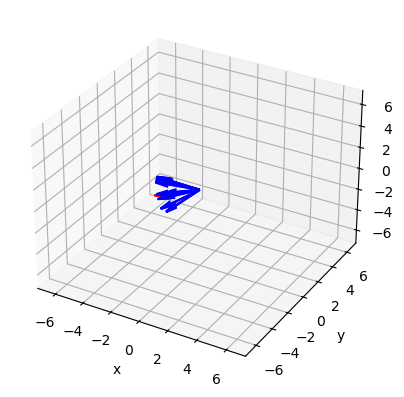

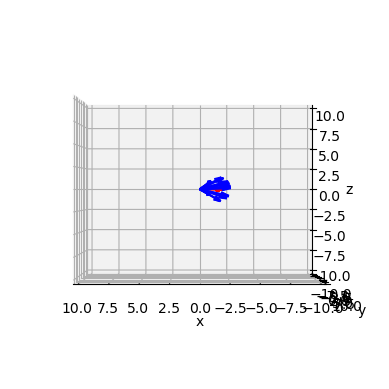

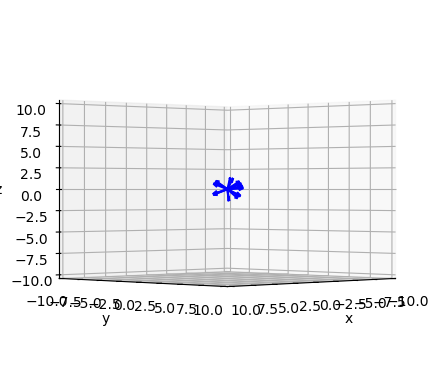

In [683]:
N = 20
vtest = np.zeros((N,3))
direction = np.random.rand(3)*6 -6
for i in range(N):
    vtest[i] = np.array([-2, -2, 0])

# print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
# print(vNorm)
theta1 = -np.arccos(vtest[:, 2]/vNorm)
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])
# phi1 = np.arctan2(vtest[:, 1], vtest[:, 0])

# rotateMat = np.array([np.sin(theta1)*np.cos(phi1), np.sin(theta1)*np.sin(phi1), np.cos(theta1)])
# print(rotateMat)
# print(rotateMat*vNorm)

chi = np.ones(N)*np.pi/6
phi = np.pi*2*np.random.rand(N)

rotateMat = np.array([np.sin(chi)*np.cos(phi), np.sin(chi)*np.sin(phi), np.cos(chi)])
print(rotateMat.T.shape)
# Vrotate = rotateMat.T*vNorm
Vrotate = np.multiply(rotateMat, vNorm).T
print(Vrotate.shape)
# print(np.linalg.norm(Vrotate, axis=1))

rz = R.from_matrix(rotate_matrix(phi1, theta1))

# vtest_rotate = rz.apply(Vrotate, inverse=True)
vtest_rotate = rz.apply(Vrotate)
# print(vtest_rotate)
vtestplus = vtest + vtest_rotate

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45, roll=0)
plt.show()

(200, 3)
(200, 3)


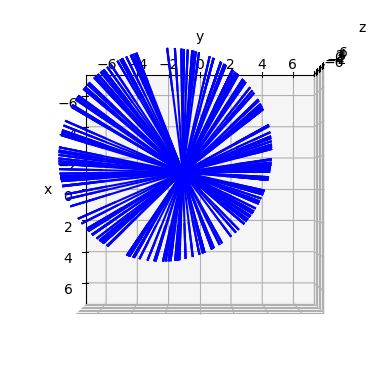

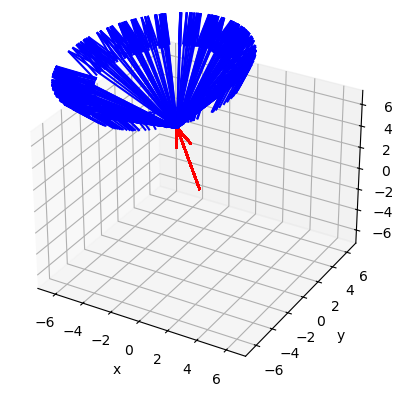

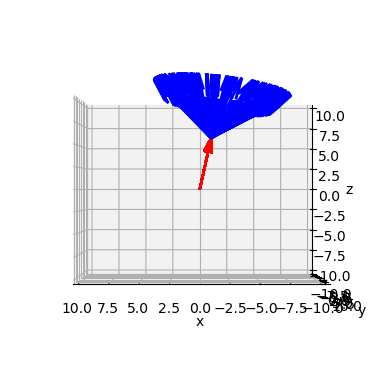

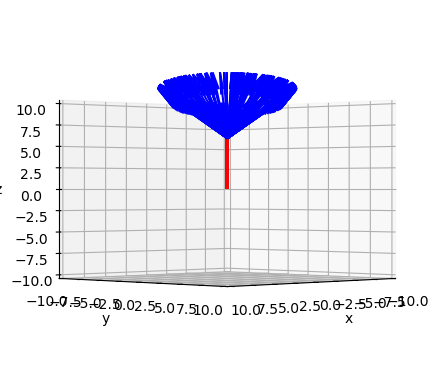

In [705]:
N = 200
vtest = np.zeros((N,3))
direction = np.random.rand(3)*6 -6
for i in range(N):
    vtest[i] = np.array([-1, -1, 6])

# print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
# print(vNorm)
theta1 = -np.arccos(vtest[:, 2]/vNorm)
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])
# phi1 = np.arctan2(vtest[:, 1], vtest[:, 0])

# rotateMat = np.array([np.sin(theta1)*np.cos(phi1), np.sin(theta1)*np.sin(phi1), np.cos(theta1)])
# print(rotateMat)
# print(rotateMat*vNorm)

chi = np.ones(N)*np.pi/2
phi = np.pi*2*np.random.rand(N)

rotateMat = np.array([np.sin(chi)*np.cos(phi), np.sin(chi)*np.sin(phi), np.cos(chi)])
print(rotateMat.T.shape)
# Vrotate = rotateMat.T*vNorm
Vrotate = np.multiply(rotateMat, vNorm).T
print(Vrotate.shape)
# print(np.linalg.norm(Vrotate, axis=1))

rz = R.from_matrix(rotate_matrix(phi1, theta1))

# vtest_rotate = rz.apply(Vrotate, inverse=True)
vtest_rotate = rz.apply(Vrotate)
# print(vtest_rotate)
vtestplus = vtest + vtest_rotate

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45, roll=0)
plt.show()

(200, 3)
(200, 3)


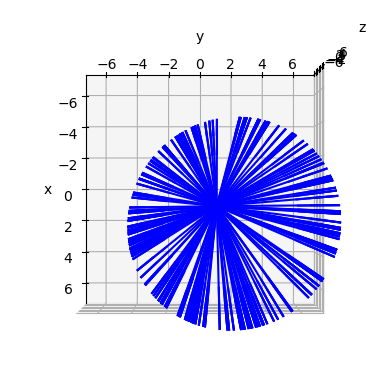

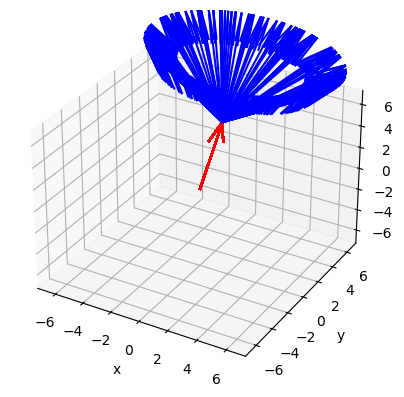

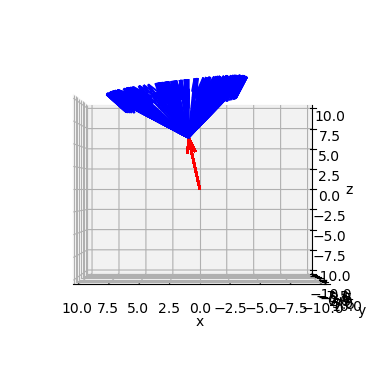

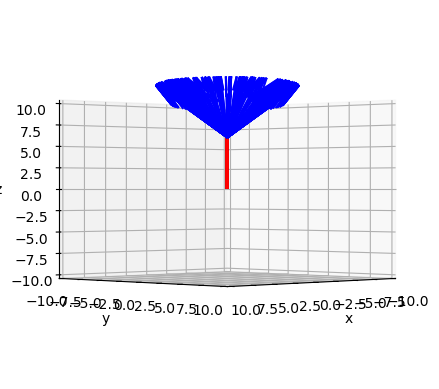

In [703]:
N = 200
vtest = np.zeros((N,3))
direction = np.random.rand(3)*6 -6
for i in range(N):
    vtest[i] = np.array([1, 1, 6])

# print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
# print(vNorm)
theta1 = np.arccos(vtest[:, 2]/vNorm)
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])
# phi1 = np.arctan2(vtest[:, 1], vtest[:, 0])

# rotateMat = np.array([np.sin(theta1)*np.cos(phi1), np.sin(theta1)*np.sin(phi1), np.cos(theta1)])
# print(rotateMat)
# print(rotateMat*vNorm)

chi = np.ones(N)*np.pi/2
phi = np.pi*2*np.random.rand(N)

rotateMat = np.array([np.sin(chi)*np.cos(phi), np.sin(chi)*np.sin(phi), np.cos(chi)])
print(rotateMat.T.shape)
# Vrotate = rotateMat.T*vNorm
Vrotate = np.multiply(rotateMat, vNorm).T
print(Vrotate.shape)
# print(np.linalg.norm(Vrotate, axis=1))

rz = R.from_matrix(rotate_matrix(phi1, theta1))

# vtest_rotate = rz.apply(Vrotate, inverse=True)
vtest_rotate = rz.apply(Vrotate)
# print(vtest_rotate)
vtestplus = vtest + vtest_rotate

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45, roll=0)
plt.show()

In [737]:
N = 20
vtest = np.random.rand(N,3) - 0.5

print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
vfilp = np.ones(vtest.shape[0])
filp_indice = np.array(vtest[:, 0] < 0)
vfilp[filp_indice] = -1
print(vfilp)

theta1 = np.arccos(vtest[:, 2]/vNorm)*vfilp
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])

print(theta1)
print(np.arccos(vtest[:, 2]/vNorm))

[[ 0.22293406  0.09150733 -0.12086955]
 [ 0.00236114  0.31664009  0.38989215]
 [ 0.09430129 -0.2084127   0.25942475]
 [-0.09990057  0.30662007  0.2218472 ]
 [ 0.15559152  0.32447032 -0.15753032]
 [ 0.46472037 -0.41875238  0.27203713]
 [ 0.04975795  0.39354637 -0.19880611]
 [ 0.12667826  0.26693281 -0.10135338]
 [ 0.24143275  0.22022623 -0.27196537]
 [ 0.34607276 -0.21599687 -0.06593449]
 [ 0.05172056  0.25028508  0.20098087]
 [-0.24948113  0.30206113  0.23744404]
 [ 0.4482015   0.36808204 -0.08544194]
 [ 0.34077154  0.20031708  0.01702796]
 [ 0.41651962  0.30167923 -0.4700981 ]
 [ 0.27260028  0.44652298 -0.21244893]
 [ 0.01114186 -0.23439192  0.03580062]
 [-0.01757306  0.32283036  0.38548296]
 [-0.24363089 -0.06852075 -0.29003592]
 [-0.09625853 -0.05274747 -0.3912215 ]]
[ 1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.
 -1. -1.]
[ 2.03569688  0.68210257  0.72265466 -0.96821555  1.98343383  1.16059254
  2.03538405  1.90124676  2.26489016  1.73103563  0.90440776 -1

[-0.76253852  1.16833443  1.30563131]
(200, 3)
(200, 3)


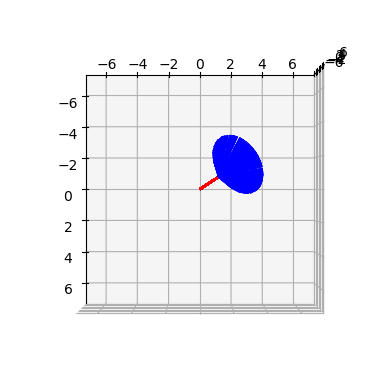

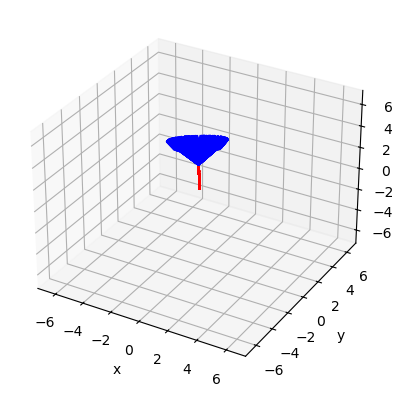

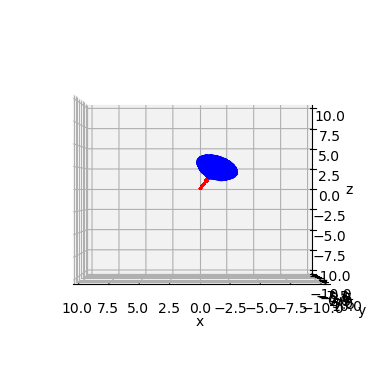

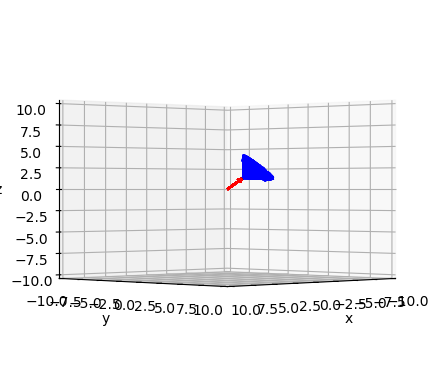

In [757]:
N = 200
vtest = np.zeros((N,3))
direction = np.random.rand(3)*6 -3
print(direction)
for i in range(N):
    vtest[i] = direction

# print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
vfilp = np.ones(vtest.shape[0])
filp_indice = np.array(vtest[:, 0] < 0)
vfilp[filp_indice] = -1
# print(vNorm)
theta1 = np.arccos(vtest[:, 2]/vNorm)*vfilp
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])
# phi1 = np.arctan2(vtest[:, 1], vtest[:, 0])

# rotateMat = np.array([np.sin(theta1)*np.cos(phi1), np.sin(theta1)*np.sin(phi1), np.cos(theta1)])
# print(rotateMat)
# print(rotateMat*vNorm)

chi = np.ones(N)*np.pi/2
phi = np.pi*2*np.random.rand(N)

rotateMat = np.array([np.sin(chi)*np.cos(phi), np.sin(chi)*np.sin(phi), np.cos(chi)])
print(rotateMat.T.shape)
# Vrotate = rotateMat.T*vNorm
Vrotate = np.multiply(rotateMat, vNorm).T
print(Vrotate.shape)
# print(np.linalg.norm(Vrotate, axis=1))

rz = R.from_matrix(rotate_matrix(phi1, theta1))

# vtest_rotate = rz.apply(Vrotate, inverse=True)
vtest_rotate = rz.apply(Vrotate)
# print(vtest_rotate)
vtestplus = vtest + vtest_rotate

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()


ax = plt.figure().add_subplot(projection='3d')

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtestplus[:,0], vtestplus[:,1], vtestplus[:,2], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45, roll=0)
plt.show()

In [3]:
def newVel_gpu(self, v, vMag):

    energy = 0.5*self.Al_m*vMag**2/self.q
    vMagnew = vMag
    vfilp = np.ones(v.shape[0])
    filp_indice = np.array(v[:, 0] < 0)
    vfilp[filp_indice] = -1
    theta0 = np.arccos(v[:, 2]/vMag)*vfilp
    phi0= np.arctan(v[:, 1]/v[:, 0])

    chi = self.DCS_pdf(energy)
    N = energy.shape[0]
    phi = 2*np.pi*np.random.rand(N)

    rotateMat = np.array([np.sin(chi)*np.cos(phi), np.sin(chi)*np.sin(phi), np.cos(chi)])
    Vrotate = np.multiply(rotateMat, vMagnew).T
    rz = R.from_matrix(self.rotate_matrix(phi0, theta0))
    vtest_rotate = rz.apply(Vrotate)

    return vtest_rotate 

(200, 3)
(200, 3)
2.035753232291472
1.7740417283748702
2.035753232291472
1.7740417283748702


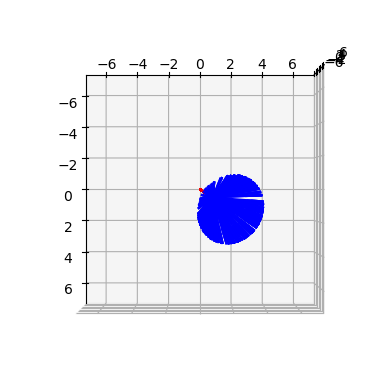

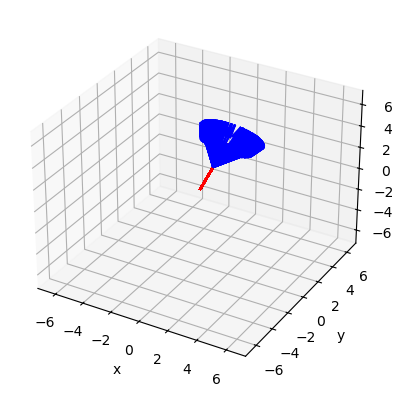

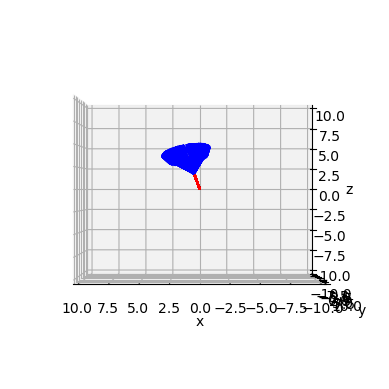

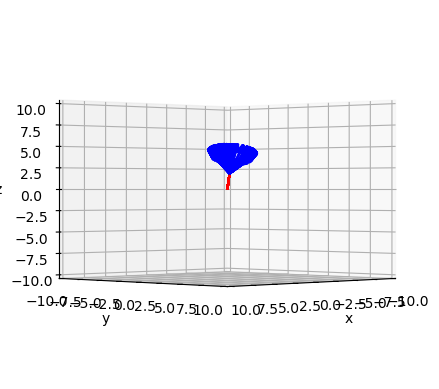

In [21]:
N = 200
vtest = np.zeros((N,3))
direction = np.random.rand(3)*6 -3
# print(direction)
for i in range(N):
    vtest[i] = direction

# print(vtest)
vNorm = np.linalg.norm(vtest, axis=1)
# print(vNorm)
vfilp = np.ones(vtest.shape[0])
filp_indice = np.array(vtest[:, 0] < 0)
vfilp[filp_indice] = -1
# print(vNorm)
theta1 = np.arccos(vtest[:, 2]/vNorm)*vfilp
phi1 = np.arctan(vtest[:, 1]/vtest[:, 0])
# phi1 = np.arctan2(vtest[:, 1], vtest[:, 0])

chi = np.ones(N)*np.pi/3
phi = np.pi*2*np.random.rand(N)

rotateMat = np.array([np.sin(chi)*np.cos(phi), np.sin(chi)*np.sin(phi), np.cos(chi)])
# print(rotateMat.T.shape)
# Vrotate = rotateMat.T*vNorm
Vrotate = np.multiply(rotateMat, vNorm).T
print(Vrotate.shape)
# print(np.linalg.norm(Vrotate, axis=1))

mp = 27
mg = 40

# vtest_rotate = (mp*vtest + mg*Vrotate)/(27+40)

rz = R.from_matrix(rotate_matrix(phi1, theta1))

# # vtest_rotate = rz.apply(Vrotate, inverse=True)
vtest_rotate = rz.apply(Vrotate)

vtest_rotate = (mp*vtest + mg*vtest_rotate)/(mp+mg)
# print(vtest_rotate)
vtestplus = vtest + vtest_rotate

print(vtest.shape)
print(np.linalg.norm(vtest[0]))
print(np.linalg.norm(vtest_rotate[0]))

print(np.linalg.norm(vtest[10]))
print(np.linalg.norm(vtest_rotate[10]))
ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2],length=vNorm[0], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2],length=vNorm[0], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.view_init(elev=90, azim=0, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2],length=vNorm[0], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2],length=vNorm[0], color='blue')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(elev=0, azim=90, roll=0)
plt.show()

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
origin = np.zeros((N,3))
# Make the direction data for the arrows

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2],length=vNorm[0], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2],length=vNorm[0], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=90, roll=0)
plt.show()


ax = plt.figure().add_subplot(projection='3d')

ax.quiver(origin[:,0], origin[:,1], origin[:,2], vtest[:,0], vtest[:,1], vtest[:,2],length=vNorm[0], color='red')
ax.quiver(vtest[:,0], vtest[:,1], vtest[:,2], vtest_rotate[:,0], vtest_rotate[:,1], vtest_rotate[:,2],length=vNorm[0], color='blue')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=45, roll=0)
plt.show()

In [576]:
vtest = np.random.rand(3)
print(vtest)

z = np.arctan(vtest[1]/vtest[0])
print(z)
y = np.random.rand()*np.pi*2
# y = 0

rz = R.from_matrix([[np.cos(z), -np.sin(z), 0],
                    [np.sin(z),  np.cos(z), 0],
                    [0,          0,         1]])

ry = R.from_matrix([[np.cos(y),          0, np.sin(y)],
                    [0,          np.cos(z),        0],
                    [-np.sin(y),    0,     np.cos(y)]])

vtest_rotatez = rz.apply(vtest)
vtest_rotatezy = ry.apply(vtest_rotatez)
print(vtest_rotatez)
print(vtest_rotatezy)

[0.83371287 0.75132008 0.29612587]
0.7334631537543406
[0.1163639  1.11625197 0.29612587]
[-0.31811727  1.11625197  0.00570042]
